In [1]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import img_to_array, load_img
import os


In [2]:

base_dir = 'dogs-vs-cats'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of base directory:
['sampleSubmission.csv', 'test', 'test1.zip', 'train', 'validation']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [3]:


train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [4]:

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg']


In [5]:

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))


total training cat images : 12500
total training dog images : 12500
total validation cat images : 500
total validation dog images : 500


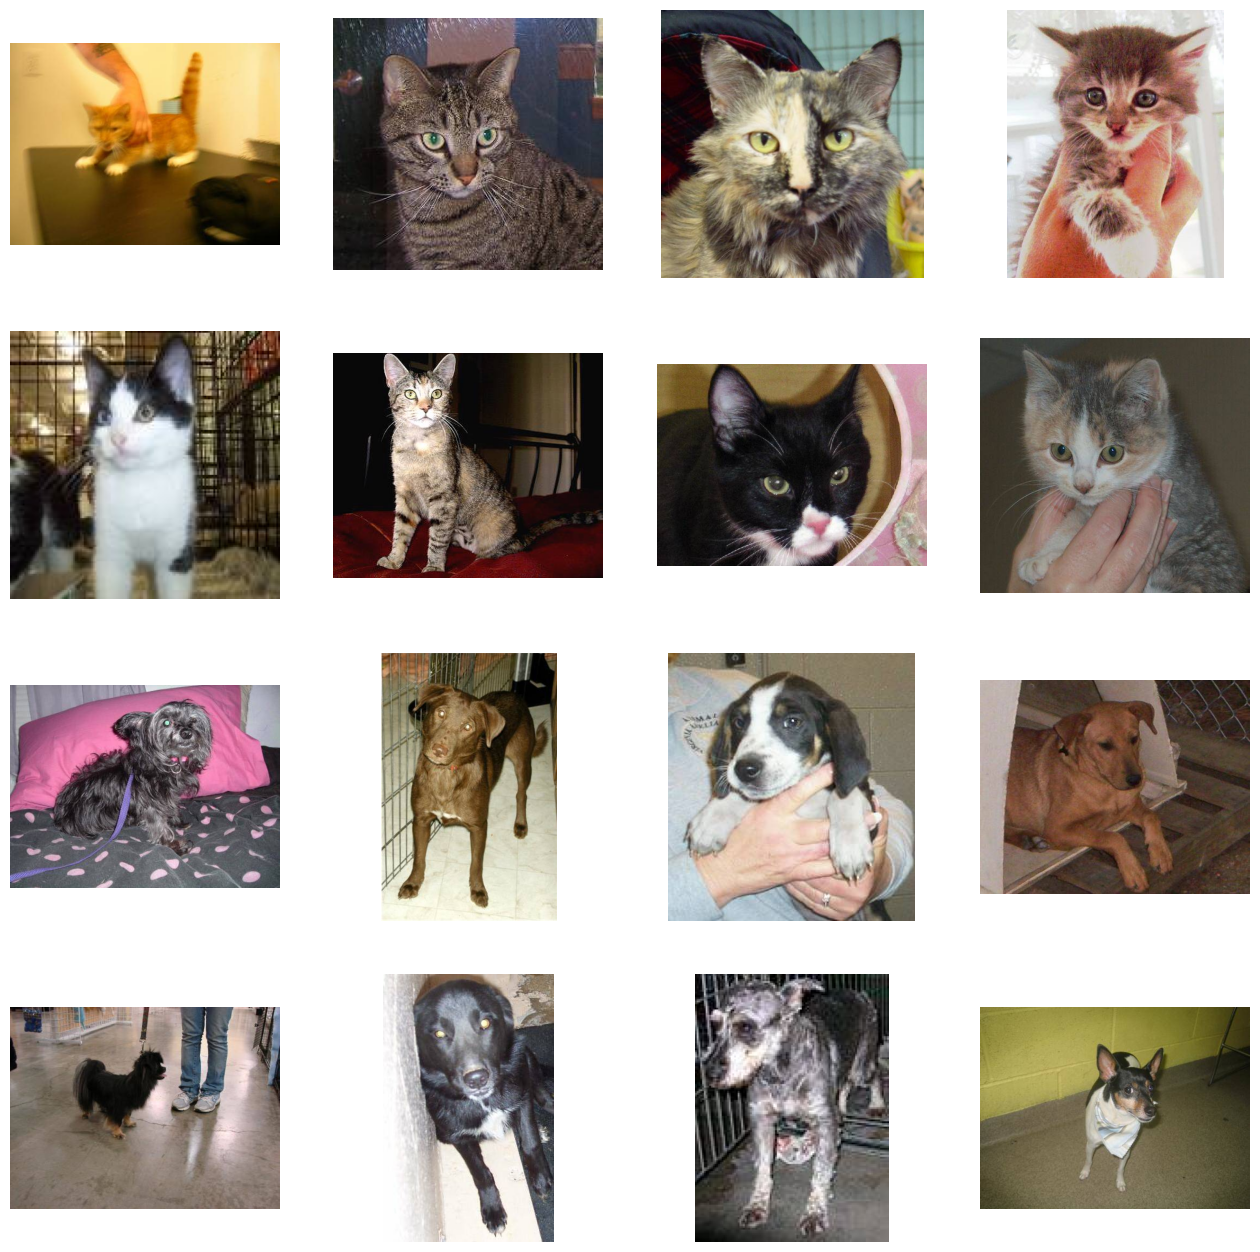

In [6]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [ os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[ pic_index-8:pic_index] ]

next_dog_pix = [ os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[ pic_index-8:pic_index] ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [8]:

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        batch_size=20,
                        class_mode='binary',
                        target_size=(150, 150)
)     
validation_generator =  test_datagen.flow_from_directory(
                        validation_dir,
                        batch_size=20,
                        class_mode  = 'binary',
                        target_size = (150, 150)
)


Found 25000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics = ['accuracy']
)


In [10]:

history = model.fit(
            train_generator,
            epochs=10,
            validation_data = validation_generator,
            verbose=2
)

Epoch 1/10
1250/1250 - 333s - loss: 0.5935 - accuracy: 0.6977 - val_loss: 0.4268 - val_accuracy: 0.7990 - 333s/epoch - 267ms/step
Epoch 2/10
1250/1250 - 334s - loss: 0.4471 - accuracy: 0.7914 - val_loss: 0.3357 - val_accuracy: 0.8520 - 334s/epoch - 267ms/step
Epoch 3/10
1250/1250 - 344s - loss: 0.3774 - accuracy: 0.8293 - val_loss: 0.3205 - val_accuracy: 0.8540 - 344s/epoch - 275ms/step
Epoch 4/10
1250/1250 - 331s - loss: 0.3147 - accuracy: 0.8657 - val_loss: 0.2884 - val_accuracy: 0.8710 - 331s/epoch - 265ms/step
Epoch 5/10
1250/1250 - 321s - loss: 0.2460 - accuracy: 0.8995 - val_loss: 0.1526 - val_accuracy: 0.9550 - 321s/epoch - 257ms/step
Epoch 6/10
1250/1250 - 318s - loss: 0.1726 - accuracy: 0.9321 - val_loss: 0.0770 - val_accuracy: 0.9720 - 318s/epoch - 254ms/step
Epoch 7/10
1250/1250 - 329s - loss: 0.1101 - accuracy: 0.9596 - val_loss: 0.0486 - val_accuracy: 0.9830 - 329s/epoch - 263ms/step
Epoch 8/10
1250/1250 - 319s - loss: 0.0645 - accuracy: 0.9760 - val_loss: 0.1114 - val_acc

In [19]:
import numpy as np
import random

successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) 
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)                  

x /= 255.0
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]    

1/1 [==============================] - 0s 111ms/step


C:\Users\Mr T\AppData\Local\Temp\ipykernel_4112\2919682808.py:19: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Mr T\AppData\Local\Temp\ipykernel_4112\2919682808.py:22: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


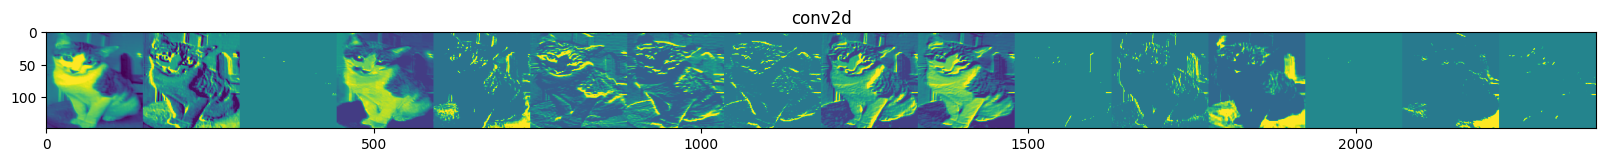

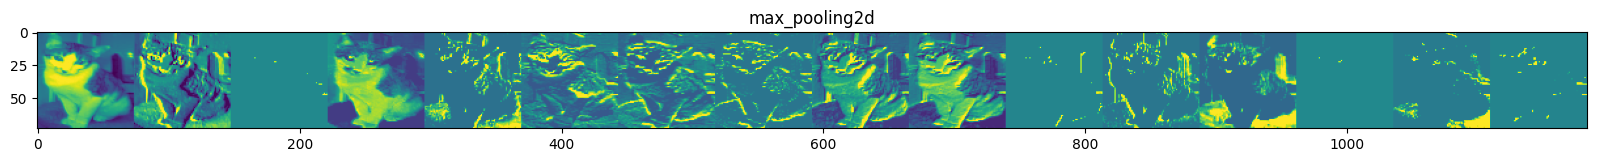

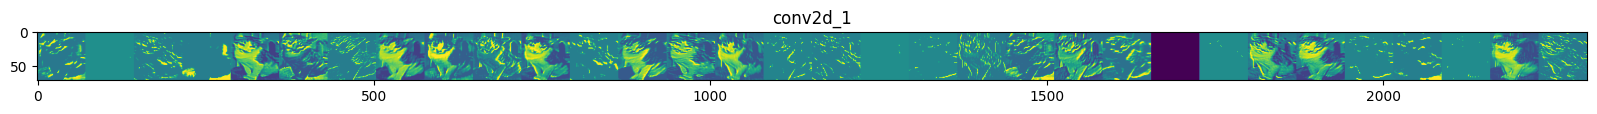

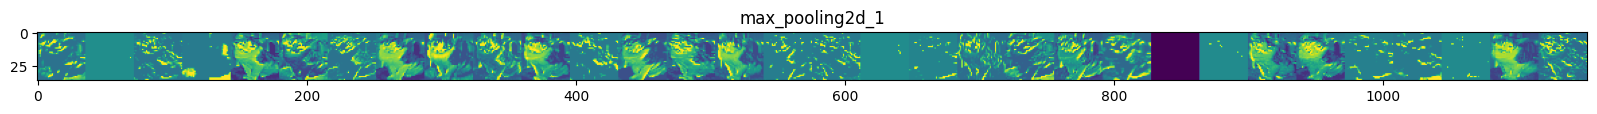

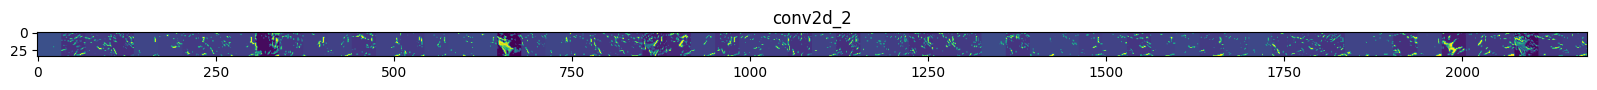

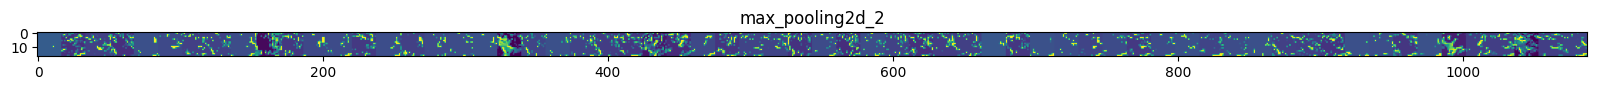

In [26]:

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
      
    n_features = feature_map.shape[-1]  
    size       = feature_map.shape[ 1]  
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )


Text(0.5, 1.0, 'Training and validation loss')

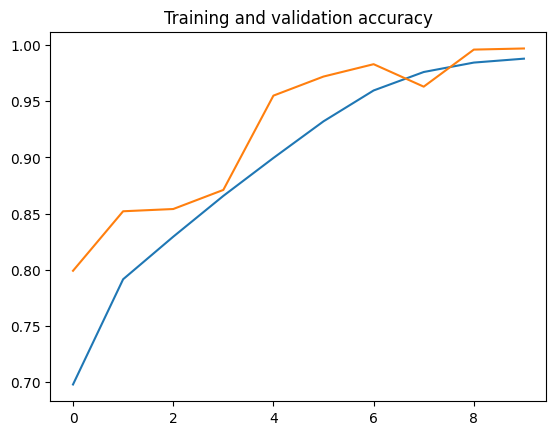

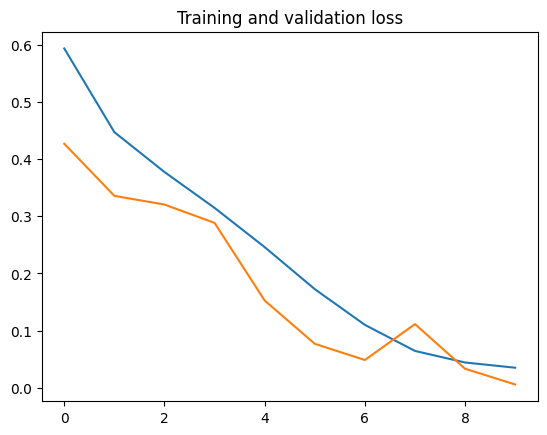

In [27]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )